<h2>Algoritmo de clasificación de Bayern

Fernando Cerriteño Magaña A01702790

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
dummies = pd.get_dummies(df['Gender'],prefix='Gender')

In [ ]:
df = pd.concat([df,dummies],axis=1)
df=df.drop(['Gender'],axis=1)
df=df.drop(['User ID'],axis=1)

In [ ]:
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,2:3],test_size=0.2,random_state=42)

In [ ]:
y_test.head()

,Purchased
209,0
280,1
33,0
210,1
93,0


In [ ]:
x_test.head()

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000


Clasificador de Bayern

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=nb.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0]


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

Exactitud del modelo

In [ ]:
print(f'Exactitud del modelo: {accuracy:.2f}')

Exactitud del modelo: 0.93


Matriz de confución

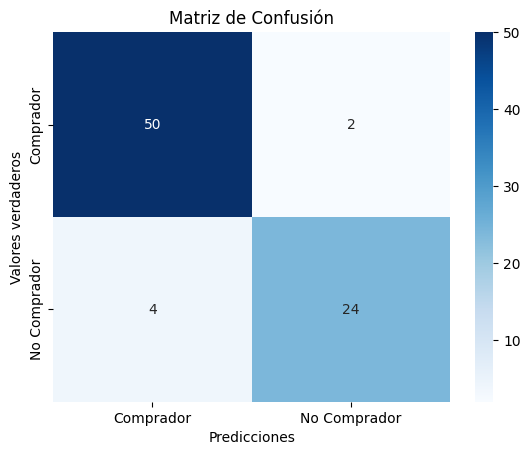

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
class_names=['Comprador','No Comprador']
tick_marks=[0.5,1.5]
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()